# 2023-08-21 2 - Results javierdev - After new loss

Plots the results from wandb runs on the constrained and ERM Autoformer runs.

Copy of `Results.ipynb` run by Javier, using the runs in `Autoformer-javierdev` wandb. Pretty similar to original results minus the Resilient runs.

This was run after the correction to the loss function, meaning in `exp_main.py`.

```python
loss = ((multipliers + 1/self.args.pred_len) * loss_all).sum()

```

## Fetching runs

In [3]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
api = wandb.Api()
project = "Autoformer-javierdev"
workspace = "alelab"
experiment_run_name_suffix="-newloss"

runs = api.runs(f"{workspace}/{project}")
all_runs = []
for run in tqdm(runs):
    if run.State=="finished":
        for split in ["train", "test"]:
            for metric in ["mse",]:
                pred_len = run.config["pred_len"]
                metrics = np.zeros(pred_len)
                if (run.name==f"Resilient{experiment_run_name_suffix}" and run.config["resilient_alpha"]==1 and run.config["resilient_beta"]==2 and run.config["resilient_lr"]==0.001) or (run.name==f"Constrained{experiment_run_name_suffix}" and run.config["dual_lr"]==0.01 and run.config["dual_init"]==1.0) or run.name==f"ERM{experiment_run_name_suffix}":
                    for i in range(pred_len):
                        run_dict = {**run.config}
                        #run_dict["constraint_level"] = constraint_level
                        run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                        run_dict["step"]=i
                        run_dict["split"] = split
                        run_dict["Algorithm"] = run.name
                        all_runs.append(run_dict)

df = pd.DataFrame(all_runs)               

100%|██████████| 32/32 [00:00<00:00, 1415.96it/s]


## Plotting results

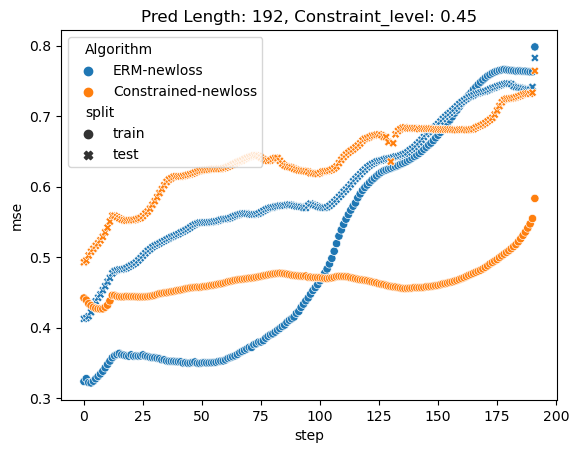

In [4]:
for pred_len, series in df.groupby("pred_len"):
    if pred_len==192: # why? 
        for constraint_level in [0.45]:
            plot_series = series[series["constraint_level"].isin([0.45, 0.0, 0.5])]
            sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
            plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
            plt.show()

In [ ]:
for pred_len, series in df.groupby("pred_len"):
    for constraint_level in [0.45, 0.5, 0.55]:
        plot_series = series[series["constraint_level"].isin([constraint_level, 0, 0.4])]
        sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        plt.show()